## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  23.146085   250.539872  0.220290  10.973169  1.448777
1  89.152563   420.526982  0.788883   6.870042  1.251704
2  34.115129   378.275716  0.528923   3.140046  1.320818
3  71.354912   282.623259  0.864443   8.371236  1.343080
4  26.239678  1545.017995  0.422677   3.891327  1.533441


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.02),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 0.97957 | train_mse: 4.00958 | train_mae: 1.59863 |  0:00:00s
epoch 1  | loss: 0.68795 | train_mse: 1.96231 | train_mae: 1.04727 |  0:00:00s
epoch 2  | loss: 0.57587 | train_mse: 1.07182 | train_mae: 0.81622 |  0:00:00s


epoch 3  | loss: 0.67479 | train_mse: 1.05747 | train_mae: 0.80121 |  0:00:00s
epoch 4  | loss: 0.53116 | train_mse: 0.77958 | train_mae: 0.71693 |  0:00:00s
epoch 5  | loss: 0.5488  | train_mse: 0.60589 | train_mae: 0.60965 |  0:00:00s


epoch 6  | loss: 0.41473 | train_mse: 0.52452 | train_mae: 0.56359 |  0:00:00s
epoch 7  | loss: 0.34843 | train_mse: 0.50527 | train_mae: 0.55464 |  0:00:00s
epoch 8  | loss: 0.36174 | train_mse: 0.4679  | train_mae: 0.52591 |  0:00:00s


epoch 9  | loss: 0.30606 | train_mse: 0.5835  | train_mae: 0.58832 |  0:00:00s
epoch 10 | loss: 0.23453 | train_mse: 0.72811 | train_mae: 0.59226 |  0:00:00s
epoch 11 | loss: 0.26856 | train_mse: 0.86723 | train_mae: 0.63414 |  0:00:01s


epoch 12 | loss: 0.21318 | train_mse: 0.73851 | train_mae: 0.59643 |  0:00:01s
epoch 13 | loss: 0.14726 | train_mse: 0.9078  | train_mae: 0.59666 |  0:00:01s
epoch 14 | loss: 0.1911  | train_mse: 0.44924 | train_mae: 0.44677 |  0:00:01s
epoch 15 | loss: 0.12071 | train_mse: 0.20182 | train_mae: 0.34981 |  0:00:01s


epoch 16 | loss: 0.18316 | train_mse: 0.21199 | train_mae: 0.3353  |  0:00:01s
epoch 17 | loss: 0.12765 | train_mse: 0.16329 | train_mae: 0.31247 |  0:00:01s
epoch 18 | loss: 0.18337 | train_mse: 0.25086 | train_mae: 0.38163 |  0:00:01s
epoch 19 | loss: 0.11655 | train_mse: 0.1866  | train_mae: 0.33884 |  0:00:01s


epoch 20 | loss: 0.09516 | train_mse: 0.13624 | train_mae: 0.28854 |  0:00:01s
epoch 21 | loss: 0.29596 | train_mse: 0.14027 | train_mae: 0.27737 |  0:00:01s
epoch 22 | loss: 0.19825 | train_mse: 0.16068 | train_mae: 0.29024 |  0:00:01s
epoch 23 | loss: 0.18612 | train_mse: 0.14983 | train_mae: 0.28821 |  0:00:01s


epoch 24 | loss: 0.15301 | train_mse: 0.12964 | train_mae: 0.28735 |  0:00:01s
epoch 25 | loss: 0.1333  | train_mse: 0.13065 | train_mae: 0.28225 |  0:00:01s
epoch 26 | loss: 0.24337 | train_mse: 0.12745 | train_mae: 0.26392 |  0:00:02s
epoch 27 | loss: 0.19358 | train_mse: 0.14494 | train_mae: 0.27958 |  0:00:02s


epoch 28 | loss: 0.16479 | train_mse: 0.1884  | train_mae: 0.31922 |  0:00:02s
epoch 29 | loss: 0.10067 | train_mse: 0.22964 | train_mae: 0.36566 |  0:00:02s
epoch 30 | loss: 0.17301 | train_mse: 0.19469 | train_mae: 0.33844 |  0:00:02s
epoch 31 | loss: 0.16827 | train_mse: 0.17719 | train_mae: 0.31276 |  0:00:02s


epoch 32 | loss: 0.11411 | train_mse: 0.1762  | train_mae: 0.29793 |  0:00:02s
epoch 33 | loss: 0.09462 | train_mse: 0.14173 | train_mae: 0.278   |  0:00:02s
epoch 34 | loss: 0.18458 | train_mse: 0.08523 | train_mae: 0.23186 |  0:00:02s
epoch 35 | loss: 0.11228 | train_mse: 0.07993 | train_mae: 0.22996 |  0:00:02s


epoch 36 | loss: 0.12863 | train_mse: 0.08162 | train_mae: 0.22726 |  0:00:02s
epoch 37 | loss: 0.12754 | train_mse: 0.08195 | train_mae: 0.22428 |  0:00:02s
epoch 38 | loss: 0.09519 | train_mse: 0.0786  | train_mae: 0.22805 |  0:00:02s


epoch 39 | loss: 0.12929 | train_mse: 0.0781  | train_mae: 0.22397 |  0:00:02s
epoch 40 | loss: 0.12723 | train_mse: 0.08519 | train_mae: 0.23644 |  0:00:02s
epoch 41 | loss: 0.12967 | train_mse: 0.07528 | train_mae: 0.21354 |  0:00:03s


epoch 42 | loss: 0.11279 | train_mse: 0.07827 | train_mae: 0.20982 |  0:00:03s
epoch 43 | loss: 0.12737 | train_mse: 0.08802 | train_mae: 0.2204  |  0:00:03s
epoch 44 | loss: 0.21703 | train_mse: 0.09793 | train_mae: 0.23346 |  0:00:03s


epoch 45 | loss: 0.10021 | train_mse: 0.08673 | train_mae: 0.22185 |  0:00:03s
epoch 46 | loss: 0.12898 | train_mse: 0.10001 | train_mae: 0.23294 |  0:00:03s
epoch 47 | loss: 0.24897 | train_mse: 0.09783 | train_mae: 0.23328 |  0:00:03s


epoch 48 | loss: 0.22487 | train_mse: 0.07544 | train_mae: 0.20836 |  0:00:03s
epoch 49 | loss: 0.08626 | train_mse: 0.07876 | train_mae: 0.21517 |  0:00:03s
epoch 50 | loss: 0.15203 | train_mse: 0.06985 | train_mae: 0.20398 |  0:00:03s


epoch 51 | loss: 0.09937 | train_mse: 0.06179 | train_mae: 0.19323 |  0:00:03s
epoch 52 | loss: 0.18968 | train_mse: 0.06359 | train_mae: 0.19014 |  0:00:03s


epoch 53 | loss: 0.14165 | train_mse: 0.06544 | train_mae: 0.19416 |  0:00:04s


epoch 54 | loss: 0.08947 | train_mse: 0.07681 | train_mae: 0.21396 |  0:00:04s
epoch 55 | loss: 0.07761 | train_mse: 0.08987 | train_mae: 0.23085 |  0:00:04s
epoch 56 | loss: 0.19691 | train_mse: 0.11826 | train_mae: 0.25924 |  0:00:04s
epoch 57 | loss: 0.0912  | train_mse: 0.11244 | train_mae: 0.25093 |  0:00:04s


epoch 58 | loss: 0.08156 | train_mse: 0.06897 | train_mae: 0.2082  |  0:00:04s
epoch 59 | loss: 0.09518 | train_mse: 0.07728 | train_mae: 0.21159 |  0:00:04s
epoch 60 | loss: 0.09935 | train_mse: 0.1077  | train_mae: 0.23127 |  0:00:04s
epoch 61 | loss: 0.10842 | train_mse: 0.12293 | train_mae: 0.25084 |  0:00:04s


epoch 62 | loss: 0.08027 | train_mse: 0.11293 | train_mae: 0.24557 |  0:00:04s
epoch 63 | loss: 0.05652 | train_mse: 0.07825 | train_mae: 0.2068  |  0:00:05s
epoch 64 | loss: 0.12069 | train_mse: 0.05662 | train_mae: 0.18571 |  0:00:05s
epoch 65 | loss: 0.07369 | train_mse: 0.05998 | train_mae: 0.19303 |  0:00:05s


epoch 66 | loss: 0.08592 | train_mse: 0.0762  | train_mae: 0.21607 |  0:00:05s
epoch 67 | loss: 0.08675 | train_mse: 0.06658 | train_mae: 0.20166 |  0:00:05s
epoch 68 | loss: 0.06153 | train_mse: 0.06616 | train_mae: 0.19058 |  0:00:05s
epoch 69 | loss: 0.12158 | train_mse: 0.0778  | train_mae: 0.20605 |  0:00:05s


epoch 70 | loss: 0.07212 | train_mse: 0.07065 | train_mae: 0.1985  |  0:00:05s
epoch 71 | loss: 0.10891 | train_mse: 0.05807 | train_mae: 0.18199 |  0:00:05s
epoch 72 | loss: 0.08254 | train_mse: 0.05268 | train_mae: 0.17666 |  0:00:05s
epoch 73 | loss: 0.05348 | train_mse: 0.08545 | train_mae: 0.20177 |  0:00:05s


epoch 74 | loss: 0.10877 | train_mse: 0.07847 | train_mae: 0.20252 |  0:00:05s
epoch 75 | loss: 0.11751 | train_mse: 0.09531 | train_mae: 0.21468 |  0:00:05s
epoch 76 | loss: 0.11977 | train_mse: 0.08084 | train_mae: 0.20694 |  0:00:05s
epoch 77 | loss: 0.18102 | train_mse: 0.0823  | train_mae: 0.20757 |  0:00:05s


epoch 78 | loss: 0.10475 | train_mse: 0.07053 | train_mae: 0.17949 |  0:00:06s
epoch 79 | loss: 0.13825 | train_mse: 0.07103 | train_mae: 0.19797 |  0:00:06s
epoch 80 | loss: 0.10758 | train_mse: 0.0781  | train_mae: 0.20749 |  0:00:06s
epoch 81 | loss: 0.16345 | train_mse: 0.13643 | train_mae: 0.26752 |  0:00:06s


epoch 82 | loss: 0.14227 | train_mse: 0.15359 | train_mae: 0.2854  |  0:00:06s
epoch 83 | loss: 0.1162  | train_mse: 0.1399  | train_mae: 0.26501 |  0:00:06s
epoch 84 | loss: 0.18937 | train_mse: 0.10523 | train_mae: 0.23196 |  0:00:06s
epoch 85 | loss: 0.10391 | train_mse: 0.09507 | train_mae: 0.21753 |  0:00:06s


epoch 86 | loss: 0.1068  | train_mse: 0.07641 | train_mae: 0.20275 |  0:00:06s
epoch 87 | loss: 0.12234 | train_mse: 0.06623 | train_mae: 0.20261 |  0:00:06s
epoch 88 | loss: 0.10991 | train_mse: 0.06485 | train_mae: 0.20269 |  0:00:06s
epoch 89 | loss: 0.11381 | train_mse: 0.06802 | train_mae: 0.20292 |  0:00:06s


epoch 90 | loss: 0.08917 | train_mse: 0.08403 | train_mae: 0.21946 |  0:00:06s
epoch 91 | loss: 0.10664 | train_mse: 0.097   | train_mae: 0.2286  |  0:00:06s
epoch 92 | loss: 0.21576 | train_mse: 0.10568 | train_mae: 0.23372 |  0:00:06s
epoch 93 | loss: 0.16027 | train_mse: 0.06416 | train_mae: 0.18904 |  0:00:07s


epoch 94 | loss: 0.05985 | train_mse: 0.05701 | train_mae: 0.18074 |  0:00:07s
epoch 95 | loss: 0.06116 | train_mse: 0.05308 | train_mae: 0.17756 |  0:00:07s
epoch 96 | loss: 0.12706 | train_mse: 0.05167 | train_mae: 0.18034 |  0:00:07s
epoch 97 | loss: 0.09505 | train_mse: 0.05663 | train_mae: 0.18878 |  0:00:07s


epoch 98 | loss: 0.0699  | train_mse: 0.05764 | train_mae: 0.1851  |  0:00:07s
epoch 99 | loss: 0.11639 | train_mse: 0.05751 | train_mae: 0.18283 |  0:00:07s
epoch 100| loss: 0.10233 | train_mse: 0.06812 | train_mae: 0.19209 |  0:00:07s
epoch 101| loss: 0.0853  | train_mse: 0.06194 | train_mae: 0.1889  |  0:00:07s


epoch 102| loss: 0.07569 | train_mse: 0.06202 | train_mae: 0.18463 |  0:00:07s
epoch 103| loss: 0.10189 | train_mse: 0.06488 | train_mae: 0.1872  |  0:00:07s
epoch 104| loss: 0.1439  | train_mse: 0.0792  | train_mae: 0.20709 |  0:00:07s
epoch 105| loss: 0.05003 | train_mse: 0.10121 | train_mae: 0.22816 |  0:00:07s


epoch 106| loss: 0.16998 | train_mse: 0.12074 | train_mae: 0.24956 |  0:00:07s
epoch 107| loss: 0.07037 | train_mse: 0.12175 | train_mae: 0.25422 |  0:00:07s
epoch 108| loss: 0.1613  | train_mse: 0.10384 | train_mae: 0.23361 |  0:00:08s
epoch 109| loss: 0.25258 | train_mse: 0.13598 | train_mae: 0.26118 |  0:00:08s


epoch 110| loss: 0.07231 | train_mse: 0.10978 | train_mae: 0.23202 |  0:00:08s
epoch 111| loss: 0.11079 | train_mse: 0.08844 | train_mae: 0.20938 |  0:00:08s
epoch 112| loss: 0.09351 | train_mse: 0.10432 | train_mae: 0.22543 |  0:00:08s
epoch 113| loss: 0.08181 | train_mse: 0.07833 | train_mae: 0.20299 |  0:00:08s


epoch 114| loss: 0.08915 | train_mse: 0.05315 | train_mae: 0.17905 |  0:00:08s
epoch 115| loss: 0.06349 | train_mse: 0.06009 | train_mae: 0.19385 |  0:00:08s
epoch 116| loss: 0.07344 | train_mse: 0.05985 | train_mae: 0.18558 |  0:00:08s
epoch 117| loss: 0.17007 | train_mse: 0.05838 | train_mae: 0.18686 |  0:00:08s


epoch 118| loss: 0.0713  | train_mse: 0.05355 | train_mae: 0.17324 |  0:00:08s
epoch 119| loss: 0.14312 | train_mse: 0.05513 | train_mae: 0.16662 |  0:00:08s
epoch 120| loss: 0.09417 | train_mse: 0.06268 | train_mae: 0.174   |  0:00:08s
epoch 121| loss: 0.11742 | train_mse: 0.07456 | train_mae: 0.19442 |  0:00:08s


epoch 122| loss: 0.0546  | train_mse: 0.06074 | train_mae: 0.18004 |  0:00:09s
epoch 123| loss: 0.08358 | train_mse: 0.05136 | train_mae: 0.16741 |  0:00:09s
epoch 124| loss: 0.05853 | train_mse: 0.05172 | train_mae: 0.16733 |  0:00:09s


epoch 125| loss: 0.11477 | train_mse: 0.05404 | train_mae: 0.17755 |  0:00:09s
epoch 126| loss: 0.08046 | train_mse: 0.06404 | train_mae: 0.19492 |  0:00:09s
epoch 127| loss: 0.07957 | train_mse: 0.06421 | train_mae: 0.19726 |  0:00:09s
epoch 128| loss: 0.05933 | train_mse: 0.05214 | train_mae: 0.17144 |  0:00:09s


epoch 129| loss: 0.06695 | train_mse: 0.04084 | train_mae: 0.14287 |  0:00:09s
epoch 130| loss: 0.09023 | train_mse: 0.03413 | train_mae: 0.13201 |  0:00:09s
epoch 131| loss: 0.10562 | train_mse: 0.03923 | train_mae: 0.14206 |  0:00:09s
epoch 132| loss: 0.05893 | train_mse: 0.0411  | train_mae: 0.1515  |  0:00:09s


epoch 133| loss: 0.05224 | train_mse: 0.04024 | train_mae: 0.15442 |  0:00:09s
epoch 134| loss: 0.05914 | train_mse: 0.03928 | train_mae: 0.1498  |  0:00:09s
epoch 135| loss: 0.06503 | train_mse: 0.04292 | train_mae: 0.15355 |  0:00:09s
epoch 136| loss: 0.10212 | train_mse: 0.04452 | train_mae: 0.15232 |  0:00:09s


epoch 137| loss: 0.16767 | train_mse: 0.07117 | train_mae: 0.20082 |  0:00:09s
epoch 138| loss: 0.07659 | train_mse: 0.07291 | train_mae: 0.20161 |  0:00:10s
epoch 139| loss: 0.05211 | train_mse: 0.05192 | train_mae: 0.1689  |  0:00:10s


epoch 140| loss: 0.10648 | train_mse: 0.04096 | train_mae: 0.15044 |  0:00:10s
epoch 141| loss: 0.07762 | train_mse: 0.04482 | train_mae: 0.16094 |  0:00:10s
epoch 142| loss: 0.05715 | train_mse: 0.05521 | train_mae: 0.17704 |  0:00:10s
epoch 143| loss: 0.06939 | train_mse: 0.0751  | train_mae: 0.20683 |  0:00:10s
epoch 144| loss: 0.08361 | train_mse: 0.06688 | train_mae: 0.19525 |  0:00:10s


epoch 145| loss: 0.07155 | train_mse: 0.07418 | train_mae: 0.19197 |  0:00:10s
epoch 146| loss: 0.145   | train_mse: 0.0976  | train_mae: 0.21856 |  0:00:10s
epoch 147| loss: 0.14135 | train_mse: 0.06536 | train_mae: 0.18714 |  0:00:10s
epoch 148| loss: 0.1264  | train_mse: 0.06466 | train_mae: 0.19672 |  0:00:10s


epoch 149| loss: 0.08137 | train_mse: 0.07187 | train_mae: 0.20482 |  0:00:10s
epoch 150| loss: 0.12707 | train_mse: 0.07115 | train_mae: 0.19399 |  0:00:10s
epoch 151| loss: 0.09314 | train_mse: 0.06534 | train_mae: 0.17717 |  0:00:10s
epoch 152| loss: 0.09153 | train_mse: 0.05414 | train_mae: 0.16837 |  0:00:10s


epoch 153| loss: 0.07143 | train_mse: 0.04857 | train_mae: 0.16358 |  0:00:11s
epoch 154| loss: 0.05325 | train_mse: 0.0533  | train_mae: 0.17683 |  0:00:11s
epoch 155| loss: 0.04657 | train_mse: 0.05531 | train_mae: 0.18106 |  0:00:11s
epoch 156| loss: 0.0565  | train_mse: 0.05876 | train_mae: 0.18187 |  0:00:11s


epoch 157| loss: 0.16338 | train_mse: 0.07681 | train_mae: 0.19976 |  0:00:11s
epoch 158| loss: 0.05196 | train_mse: 0.083   | train_mae: 0.20708 |  0:00:11s
epoch 159| loss: 0.04797 | train_mse: 0.07278 | train_mae: 0.19864 |  0:00:11s
epoch 160| loss: 0.12457 | train_mse: 0.08276 | train_mae: 0.20183 |  0:00:11s


epoch 161| loss: 0.08338 | train_mse: 0.07813 | train_mae: 0.19472 |  0:00:11s
epoch 162| loss: 0.10421 | train_mse: 0.07725 | train_mae: 0.18834 |  0:00:11s
epoch 163| loss: 0.11811 | train_mse: 0.06914 | train_mae: 0.17684 |  0:00:11s
epoch 164| loss: 0.07887 | train_mse: 0.05896 | train_mae: 0.17788 |  0:00:11s


epoch 165| loss: 0.08078 | train_mse: 0.07175 | train_mae: 0.19669 |  0:00:11s
epoch 166| loss: 0.08532 | train_mse: 0.08041 | train_mae: 0.21323 |  0:00:11s
epoch 167| loss: 0.10845 | train_mse: 0.06697 | train_mae: 0.18834 |  0:00:11s
epoch 168| loss: 0.09179 | train_mse: 0.08903 | train_mae: 0.20349 |  0:00:12s


epoch 169| loss: 0.09195 | train_mse: 0.0985  | train_mae: 0.21011 |  0:00:12s
epoch 170| loss: 0.0599  | train_mse: 0.08583 | train_mae: 0.19334 |  0:00:12s
epoch 171| loss: 0.07696 | train_mse: 0.07232 | train_mae: 0.17268 |  0:00:12s
epoch 172| loss: 0.07062 | train_mse: 0.06734 | train_mae: 0.16957 |  0:00:12s


epoch 173| loss: 0.06908 | train_mse: 0.04749 | train_mae: 0.15693 |  0:00:12s
epoch 174| loss: 0.10158 | train_mse: 0.04524 | train_mae: 0.16201 |  0:00:12s
epoch 175| loss: 0.06777 | train_mse: 0.04867 | train_mae: 0.16884 |  0:00:12s
epoch 176| loss: 0.08239 | train_mse: 0.0511  | train_mae: 0.16889 |  0:00:12s


epoch 177| loss: 0.15801 | train_mse: 0.05661 | train_mae: 0.17649 |  0:00:12s
epoch 178| loss: 0.08862 | train_mse: 0.04905 | train_mae: 0.16702 |  0:00:12s
epoch 179| loss: 0.05839 | train_mse: 0.05261 | train_mae: 0.17842 |  0:00:12s
epoch 180| loss: 0.06095 | train_mse: 0.06355 | train_mae: 0.1761  |  0:00:12s

Early stopping occurred at epoch 180 with best_epoch = 130 and best_train_mae = 0.13201
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

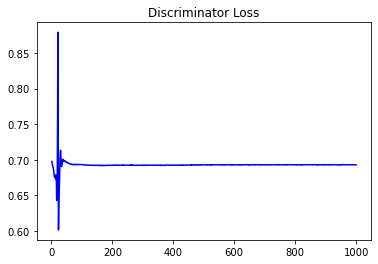

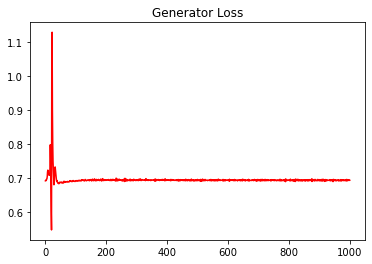

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.3238892559319429


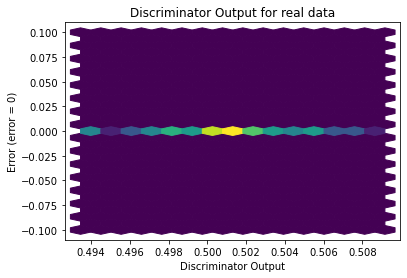

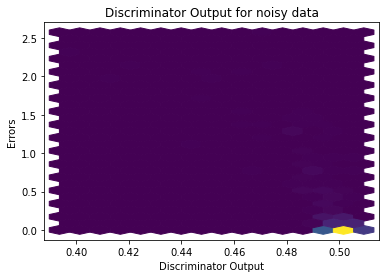

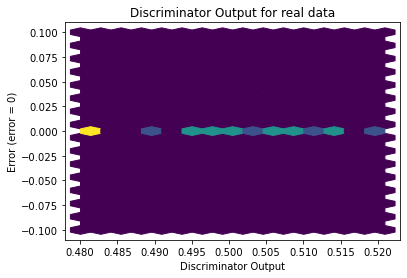

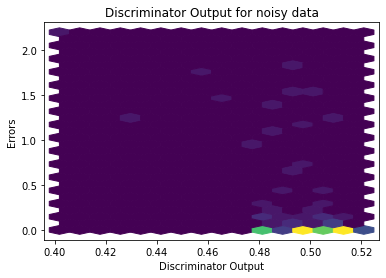

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


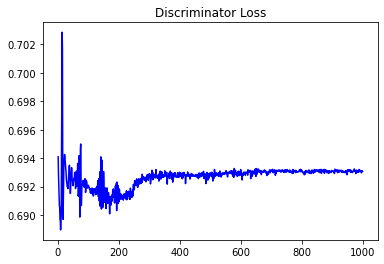

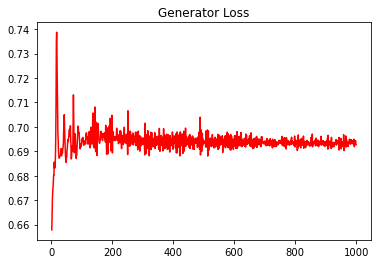

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.36904805859508627


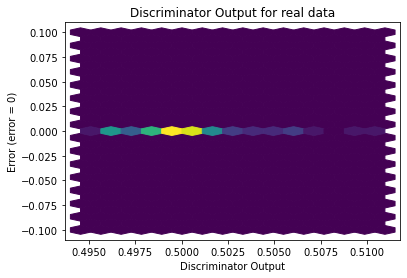

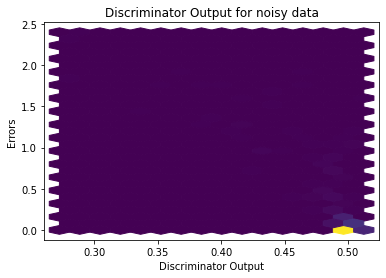

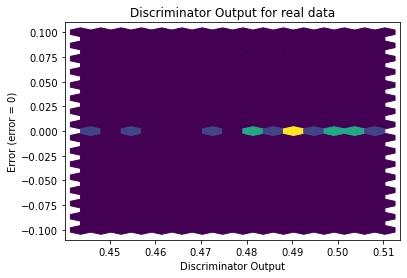

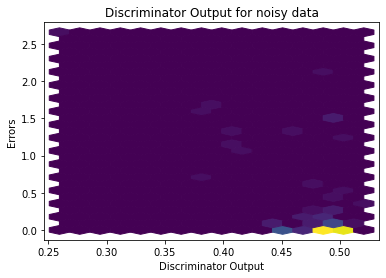

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.4662]], requires_grad=True)
